<b> Importing necessary libraries and warnings </b>

In [148]:
#Importing libraries.
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import numpy as np
from sklearn import svm
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

<b> Reading data files to a .csv file and creating dataframes </b>

In [149]:
Df = pd.read_csv(r"5.csv", encoding= 'ISO-8859-1')

In [150]:
#Returning the dataframe 'Df'.
Df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [151]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [152]:
#Reurning attributes.
Df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [153]:
#Returning shape.
Df.shape

(517, 13)

<b> Checking for null values </b>

In [154]:
#Returning total null/missing values in 'df'.
Df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [155]:
 print("No missing values found")

No missing values found


<b> Checking for outliers </b>

<AxesSubplot:>

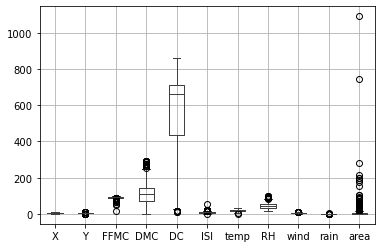

In [156]:
#Plotting boxplots.
df.boxplot(color='0.25')

<AxesSubplot:>

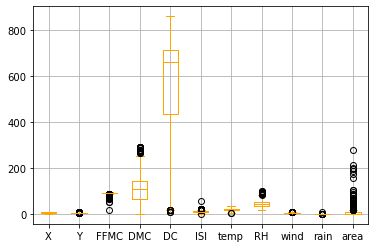

In [157]:
#Treating outliers
Df=Df[(Df.area<600)]

#Plotting boxplots.
Df.boxplot(color="Orange")

<b> Data Visualization </b>

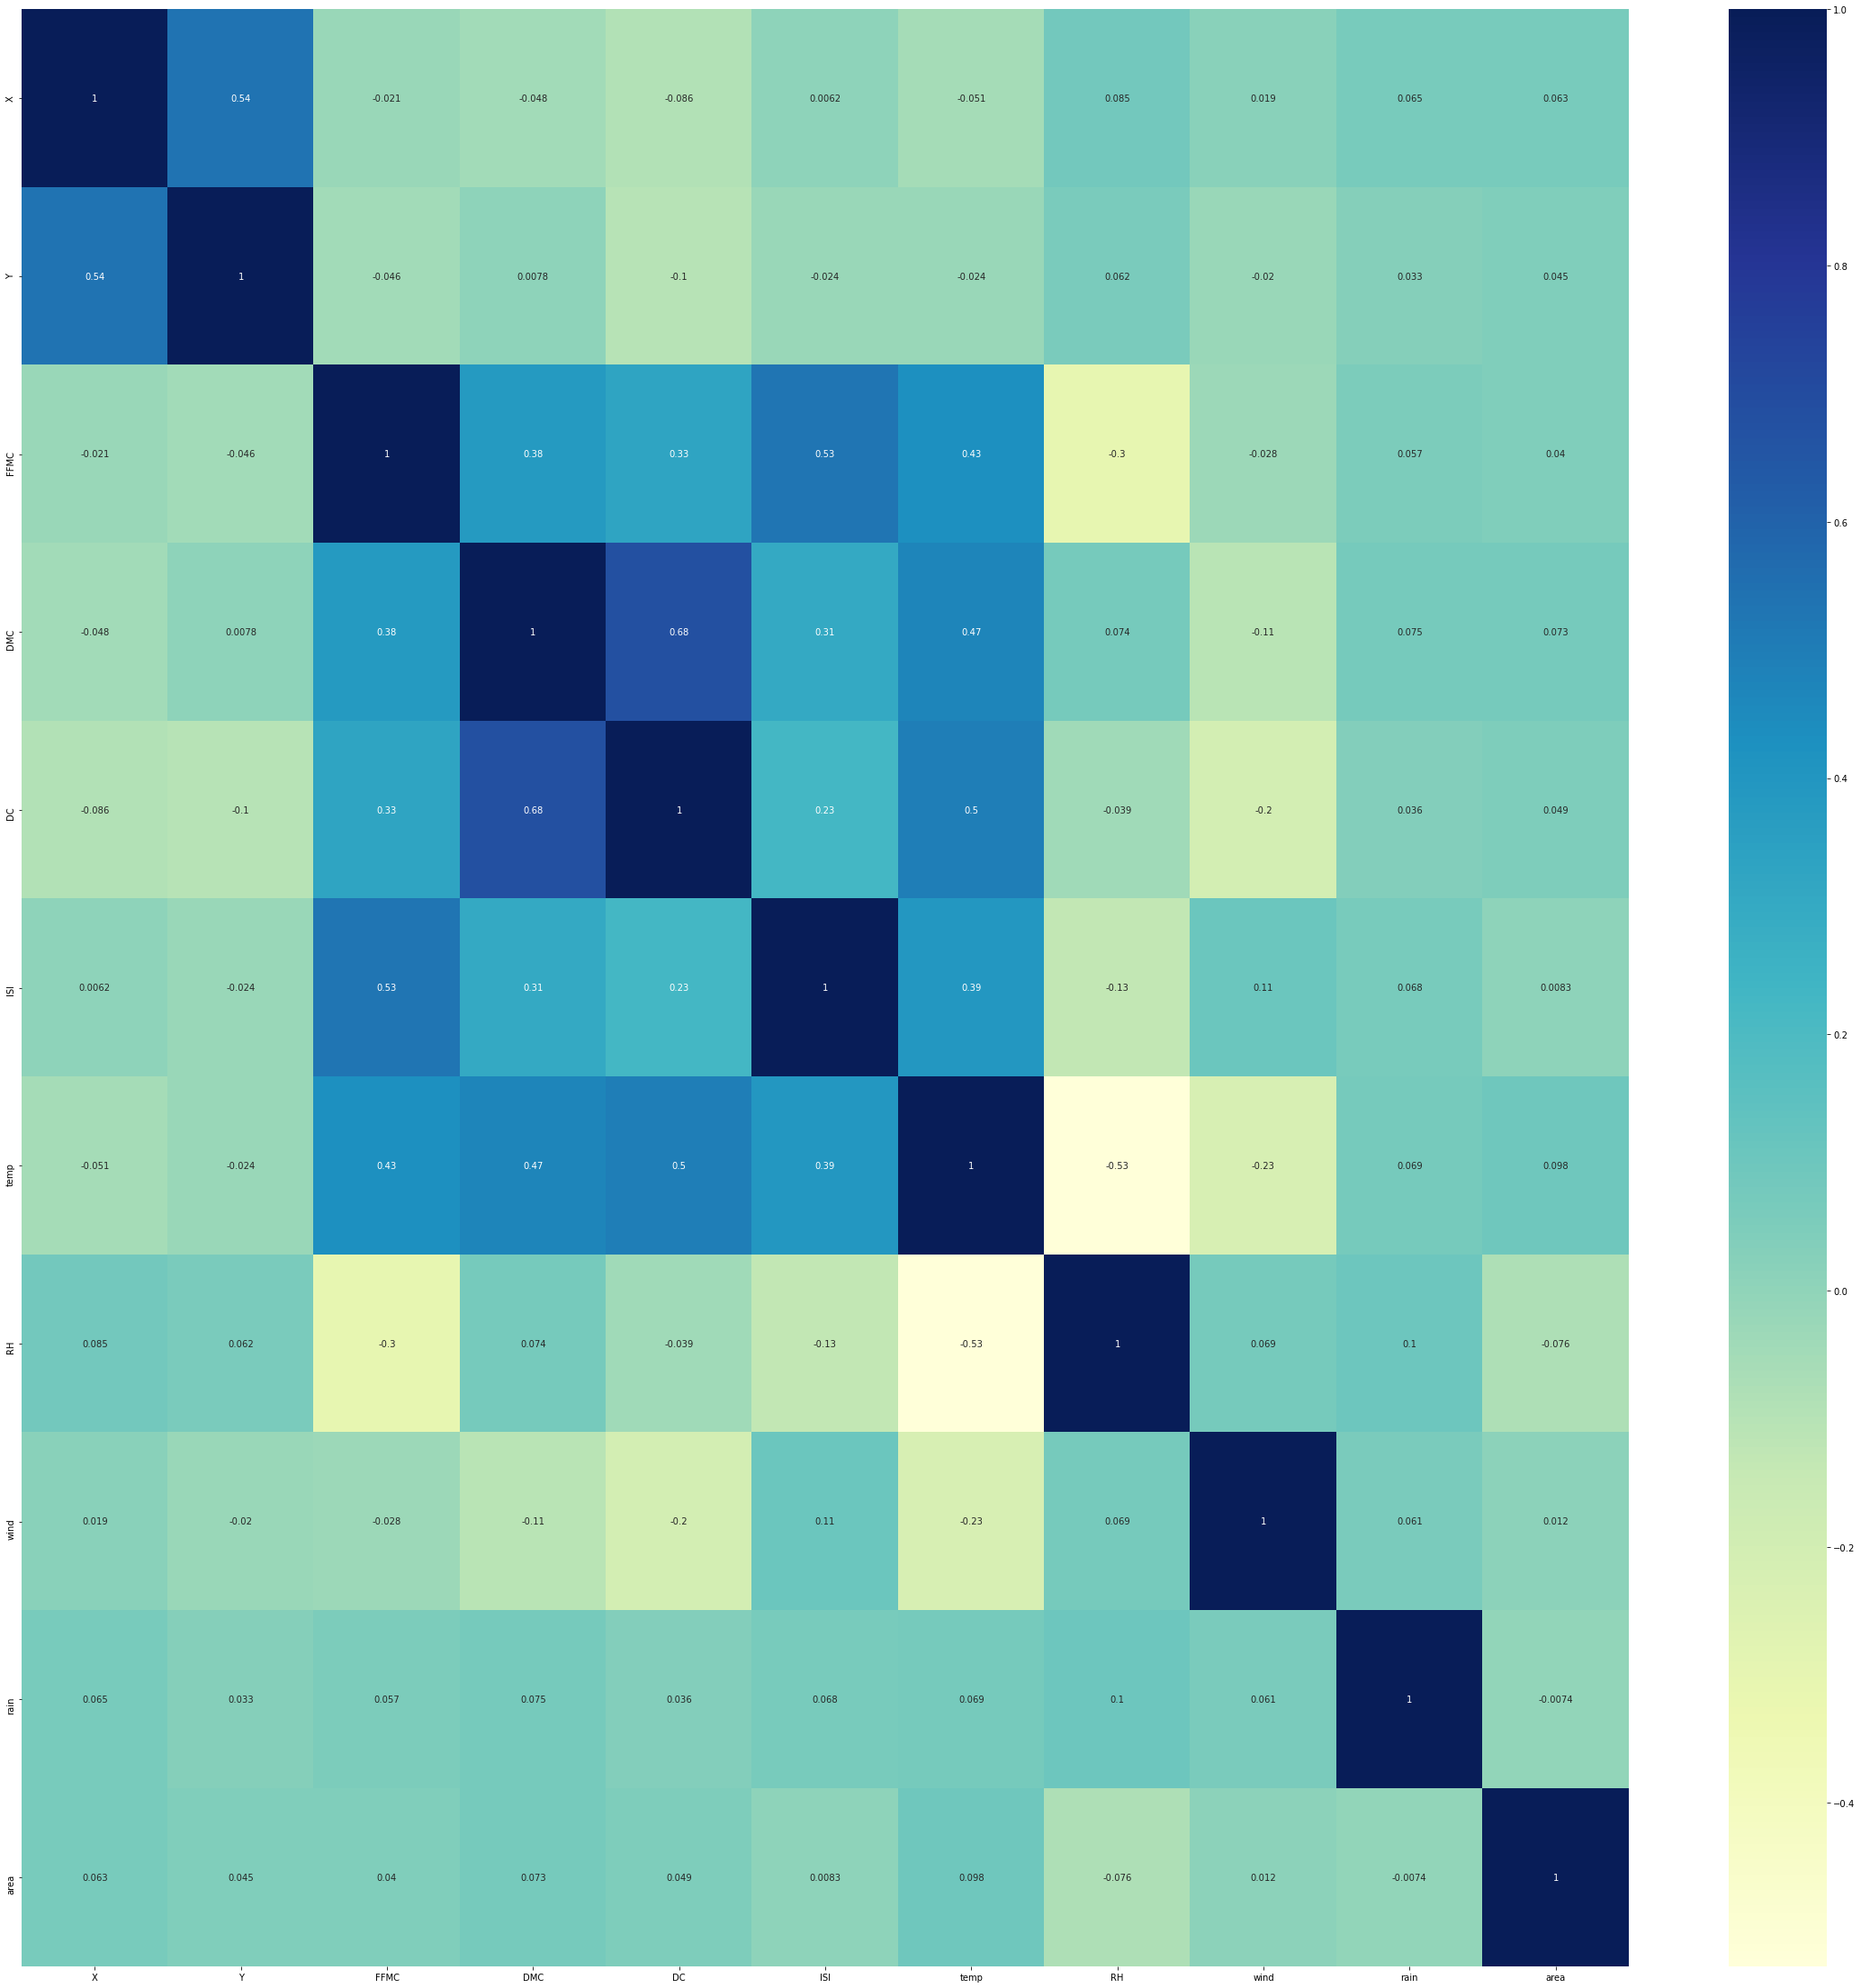

In [158]:
#Plotting a heatmap.
plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

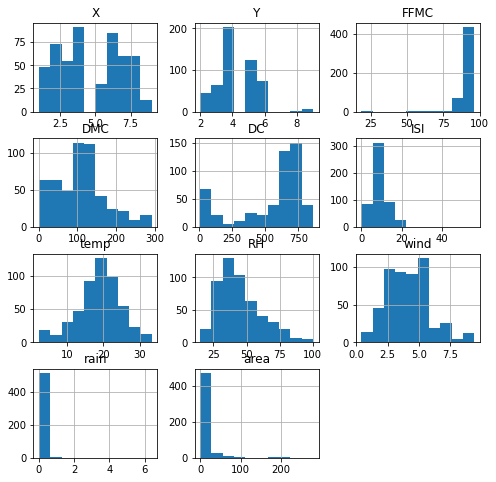

In [159]:
#Returning histogram. 
Df.hist(figsize=(8,8))

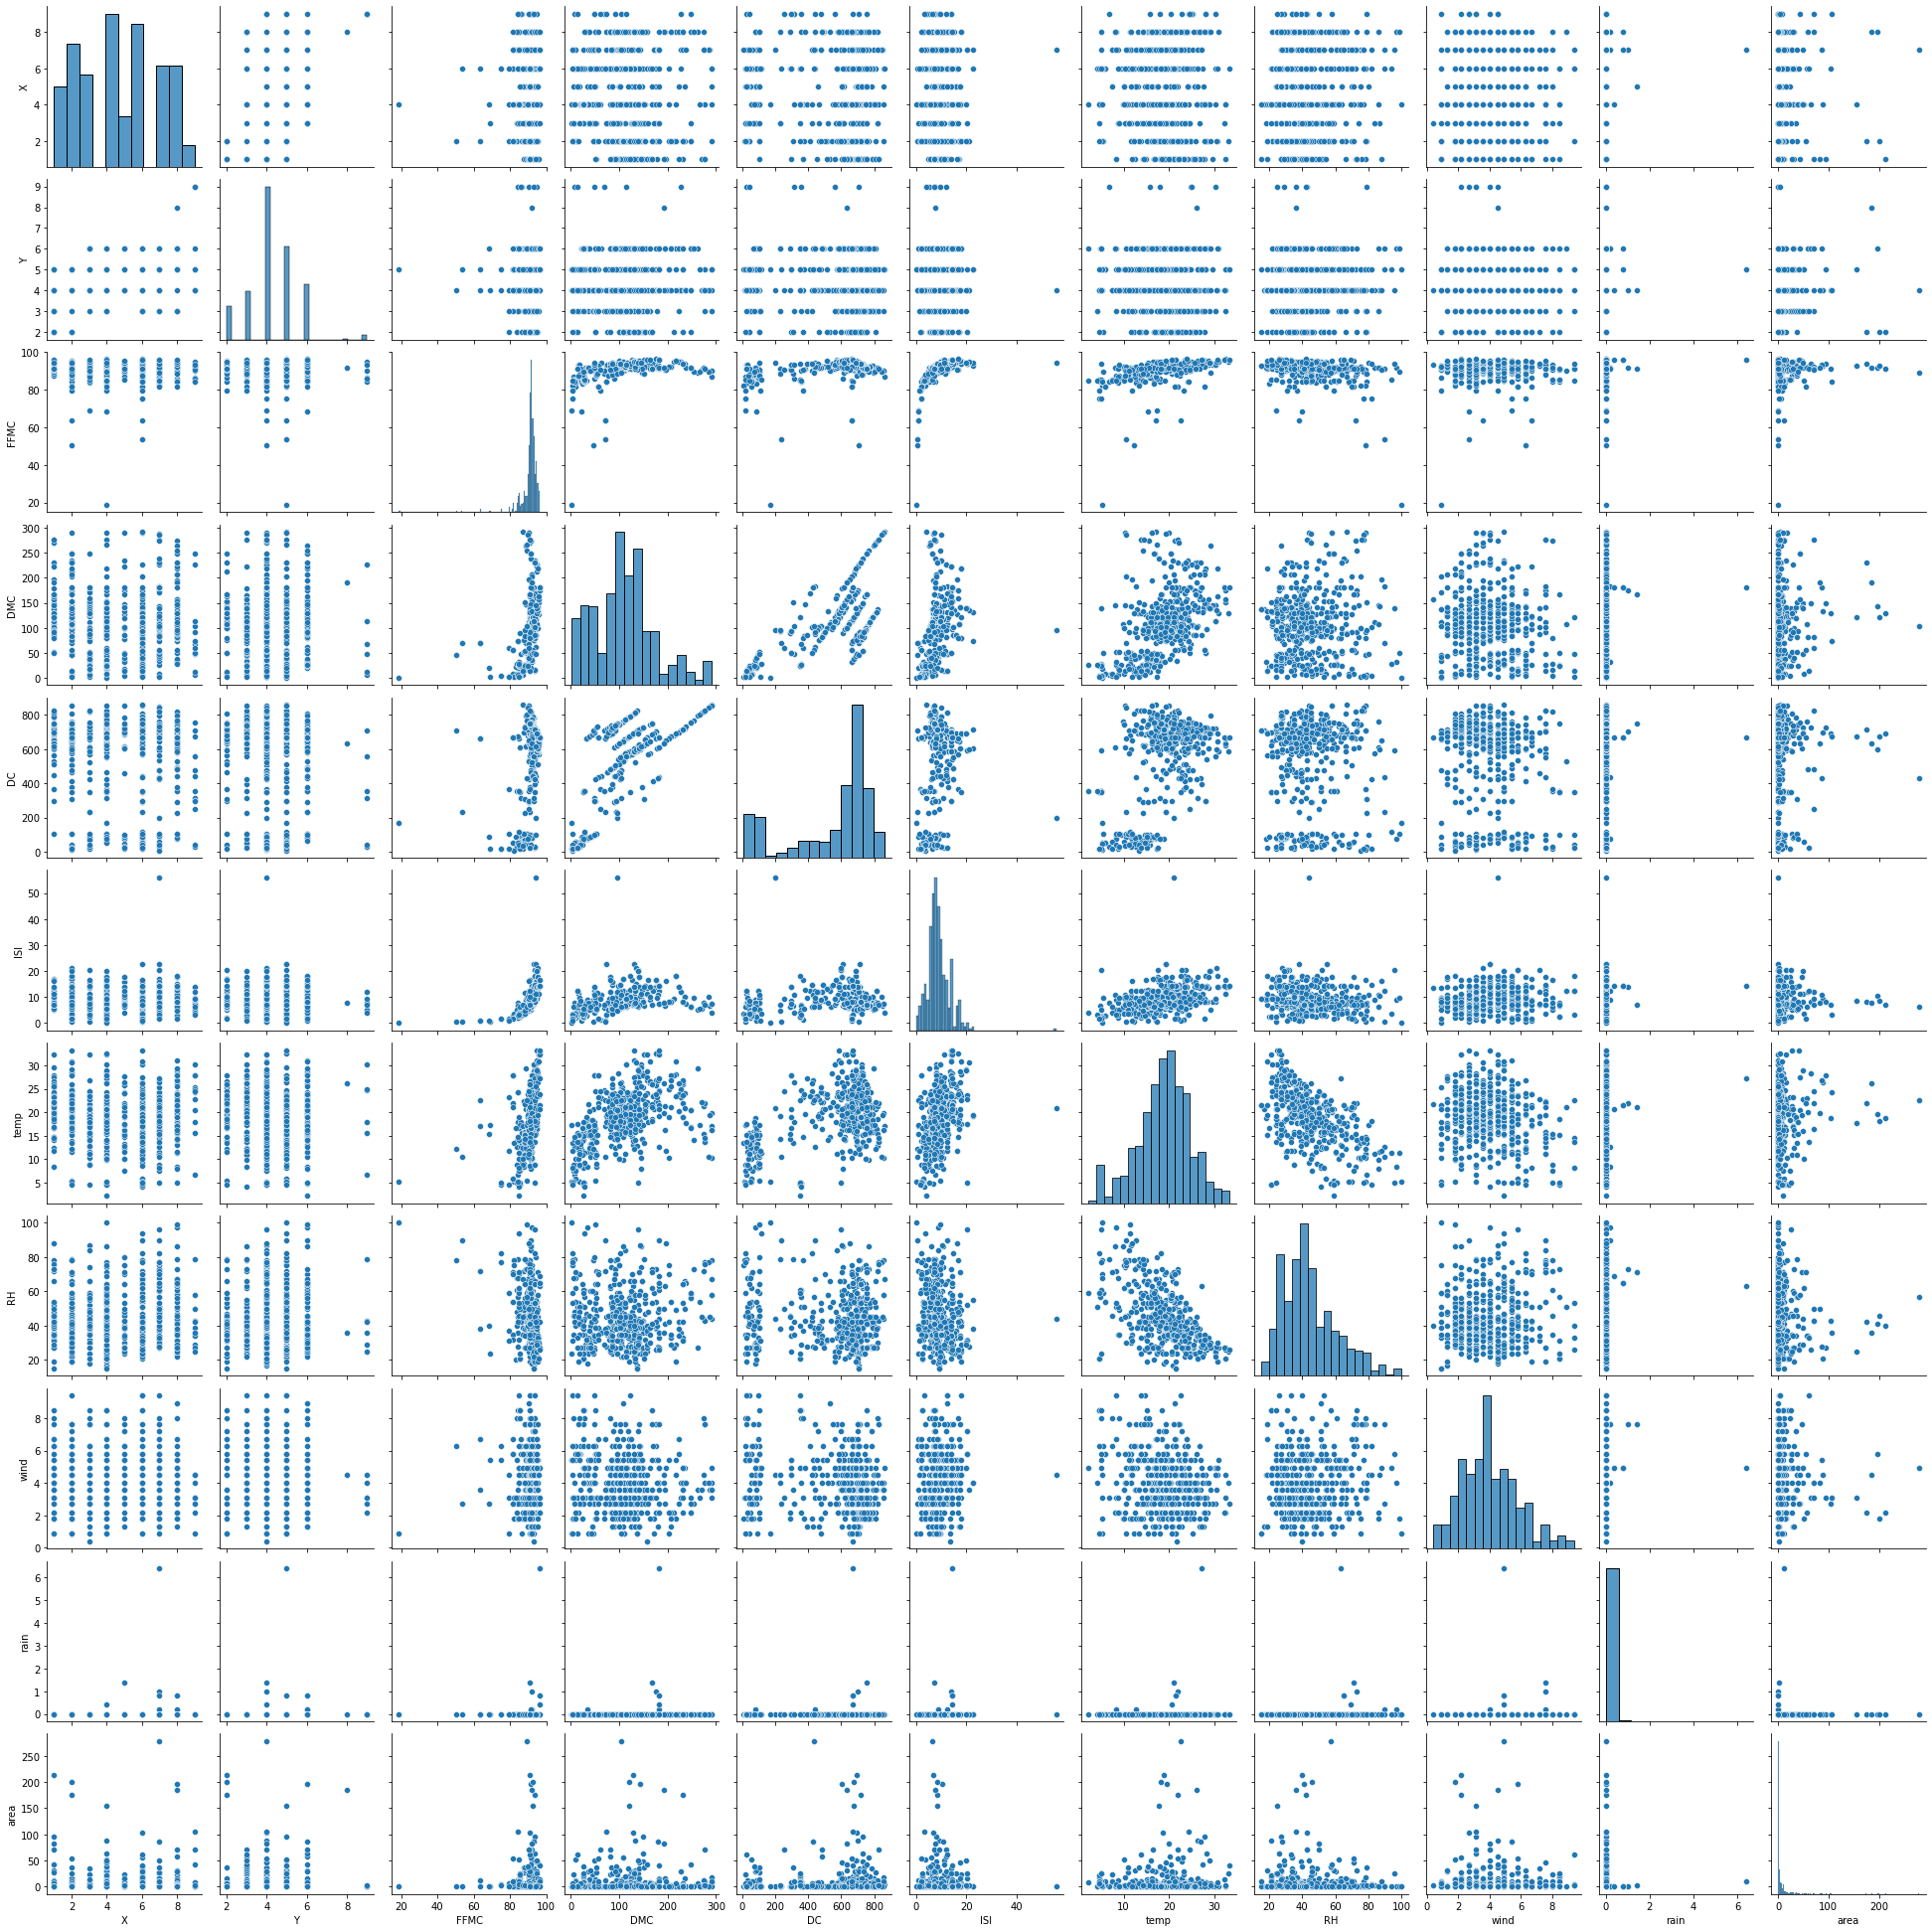

In [160]:
#Returning pairplot.
sns.pairplot(Df)
plt.show()

<b> Data Preprocessing </b>

In [161]:
#Scaling
Scaler = StandardScaler()
Num_Vars = ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
Df[Num_Vars] = Scaler.fit_transform(Df[Num_Vars])
Df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.012637,0.573791,mar,fri,-0.802817,-1.321005,-1.825883,-0.858344,-1.840114,0.407708,1.497002,-0.073411,-0.341456
1,1.012637,-0.240265,oct,tue,-0.005978,-1.177070,0.490411,-0.507374,-0.148514,-0.696749,-1.737857,-0.073411,-0.341456
2,1.012637,-0.240265,oct,sat,-0.005978,-1.047216,0.562141,-0.507374,-0.735396,-0.696749,-1.514763,-0.073411,-0.341456
3,1.445424,1.387848,mar,fri,0.193232,-1.209925,-1.893582,-0.002854,-1.822853,3.230210,-0.008880,0.601710,-0.341456
4,1.445424,1.387848,mar,sun,-0.241408,-0.928314,-1.794048,0.128760,-1.287755,3.352928,-1.235896,-0.073411,-0.341456


In [162]:
LE = LabelEncoder()
Df['month'] = LE.fit_transform(Df['month'])
Df['day'] = LE.fit_transform(Df['day'])

In [163]:
#Y.head()

<b> Building models and evaluating </b>

In [164]:
#Splitting into testing and training datasets for model building.
Train, Test= train_test_split(Df, train_size = 0.7 ,test_size = 0.3 , random_state = 100)

In [165]:
x=Train.drop(['area'], axis=1)
y=Train['area']
X_Test=test.drop(['area'], axis=1)
Y_Test=test['area']

<b> Support Vector Machine </b>

In [166]:
#Building the model.
svm_model = svm.SVR()
svm_model.fit(x, y)
Pred_svm = svm_model.predict(X_Test)

#Mean absolute error.
Mae_svm = mean_absolute_error(Y_Test,Pred_svm)

#Mean squared error.
Mse_svm = mean_squared_error(Y_Test, Pred_svm)
R2_svm = r2_score(Y_Test,Pred_svm)

In [167]:
#Returing results.
print(Mae_svm)
print(Mse_svm)
print(R2_svm)

0.34544041233304446
0.9133741529191657
-0.05632082015636675


<b> Lasso Regression </b>

In [168]:
#Building and fitting model.
lasso = Lasso()
lasso.fit(x,y)
train_score=lasso.score(x,y)
test_score=lasso.score(X_Test,Y_Test)
coeff_used = np.sum(lasso.coef_!=0)

print ("The training score is:", train_score)
print ("The test score is: ", test_score)
print ("Number of features used are: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x,y)
train_score001=lasso001.score(x,y)
test_score001=lasso001.score(X_Test,Y_Test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print ("The training score for alpha=0.01:", train_score001)
print ("The test score for alpha =0.01: ", test_score001)
print ("Number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x,y)
train_score00001=lasso00001.score(x,y)
test_score00001=lasso00001.score(X_Test,Y_Test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print ("The training score for alpha=0.0001:", train_score00001 )
print ("The test score for alpha =0.0001: ", test_score00001)


The training score is: 0.0
The test score is:  -0.000875011548478799
Number of features used are:  0
The training score for alpha=0.01: 0.028910694331530373
The test score for alpha =0.01:  -0.011462162045809743
Number of features used: for alpha =0.01: 11
The training score for alpha=0.0001: 0.03157288218540366
The test score for alpha =0.0001:  -0.0278193696144986


In [169]:
print ("Number of features used are: for alpha =0.0001:", coeff_used00001)

Number of features used are: for alpha =0.0001: 12


In [170]:
lasso_1 = Lasso(alpha=0.0001, max_iter=10e5)
rfe = RFE(lasso_1, 5)
rfe = rfe.fit(x, y)

In [171]:
list(zip(x.columns,rfe.support_, rfe.ranking_))

[('X', True, 1),
 ('Y', True, 1),
 ('month', False, 6),
 ('day', False, 4),
 ('FFMC', False, 3),
 ('DMC', True, 1),
 ('DC', False, 2),
 ('ISI', True, 1),
 ('temp', True, 1),
 ('RH', False, 7),
 ('wind', False, 5),
 ('rain', False, 8)]

In [172]:
col = x.columns[rfe.support_]
col

Index(['X', 'Y', 'DMC', 'ISI', 'temp'], dtype='object')

In [173]:
X_train_rfe = x[col]
lasso_1.fit(X_train_rfe,y)
train_score_1=lasso_1.score(X_train_rfe,y)
#test_score_1=lasso_1.score(X_test,y_test)
coeff_used_1 = np.sum(lasso_1.coef_!=0)
print ("The training score for alpha=0.0001:", train_score_1 )
#print ("test score for alpha =0.0001: ", test_score_1)
print ("Number of features used: for alpha =0.0001:", coeff_used_1)

The training score for alpha=0.0001: 0.020572371049999982
Number of features used: for alpha =0.0001: 5


In [174]:
print("Submitted by: 18BCS6201, Gaur Prabhakar (AIML-2)")

Submitted by: 18BCS6201, Gaur Prabhakar (AIML-2)
